# DATA620: Assignment 4

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Data

For this project, we will be working with a high school contact and friendship network dataset obtained from a previously completed research project on comparison between data collected using wearable sensors, contact diaries, and friendship surveys. We obtained the data from http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/. The dataset contains information from 327 individuals who took part in the study and includes five datasets broken into the following:

* Dynamical contact list
* Directed, weighted contact network from contact diaries
* Directed unweighted friendship network from surveys
* List of pairs of students for which the existence of Facebook link is known
* Metadata

Our two primary data sources are the 'Dynamical contact list' and the 'Metadata' datasets. We are provided with nodes of students who were given an anonymous ID for privacy, the classes where each student socialized, the time of each student interaction, and the gender of the student. The edges in the graph represent social contact between students with the weighted distance reflecting social proximity. 

### Plan for Analysis

* We will first download the necessary data files and upload them to Github. From Github, we can then use Python's Pandas package to read in the file.
* Create edge weights for each pair of student interactions over the 5 day period. We can do this by creating a frequency table that is grouped by the student IDs and then take $1/frequency$ to produce the weights.
* Assign the gender variable to each node of the graph
* Create the network of high school student's contact using networkx. An edge will represent contact between two student nodes and the weight of the edge is related to the number of times the students have interacted. Each node will have the categorical information of the student gender.
* Calculate degree centrality and eigenvector centrality for entire network.
* Subset data into two groups: Male and Female.
* Recalculae degree centrality and eigenvector centrality.
* Compare your centrality measures across the categorical groups.

### Hypothetical Outcome

We would like discover if one gender is, substantially, making more interpersonal connections than another. Theoretically, we should see that males and females are as equally as likely to connect to another individual. We may find that this in that the case in our dataset.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])

In [3]:
school_data.head(10)

,Time_sec,StudentID1,StudentID2,Class1,Class2
0,1385982020,454,640,MP,MP
1,1385982020,1,939,2BIO3,2BIO3
2,1385982020,185,258,PC*,PC*
3,1385982020,55,170,2BIO3,2BIO3
4,1385982020,9,453,PC,PC
5,1385982020,9,45,PC,PC
6,1385982020,14,190,PC*,PC*
7,1385982020,400,637,2BIO1,2BIO1
8,1385982020,255,275,2BIO3,2BIO3
9,1385982020,176,533,PC*,PC*


In [4]:
attribute_data.head(10)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F
5,28,2BIO2,M
6,927,2BIO1,F
7,72,2BIO1,F
8,400,2BIO1,F
9,945,2BIO1,F


As can be seen from the tables above, the dataset has a wide variety of numeric and categorical data. We’ll dive deeper into this data now.

The first dataset gives the contacts of the students of nine classes during 5 days, as measured by the SocioPatterns infrastructure. It shows the active contacts during 20-second intervals of the data collection.

The second dataset contains a list in which each line gives class and gender of the student.

In [5]:
# Randomly assign 'Gender' to unknown students
attribute_data.index[attribute_data['Gender'] == "Unknown"].tolist()

attribute_data.loc[320,'Gender'] = "F"
attribute_data.loc[321,'Gender'] = "M"
attribute_data.loc[322,'Gender'] = "F"
attribute_data.loc[323,'Gender'] = "F"
attribute_data.loc[324,'Gender'] = "M"
attribute_data.loc[325,'Gender'] = "M"
attribute_data.loc[326,'Gender'] = "M"

In [27]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.groupby(['StudentID1', 'StudentID2']).size().reset_index(name="Contacts")

# Create weights using 1/contacts to have people who are more social with eachother closer than people who hardly socialize with eachother
weighted_data["Weighted_Distance"] = 1 / weighted_data["Contacts"]

weighted_data.head(5)

,StudentID1,StudentID2,Contacts,Weighted_Distance
0,1,55,8,0.125000
1,1,63,2,0.500000
2,1,101,1,1.000000
3,1,106,4,0.250000
4,1,117,18,0.055556


In [7]:
# Add edges and weights to Graph object
G = nx.Graph()
for i in weighted_data.index:
    G.add_edge(weighted_data.iat[i,0],
               weighted_data.iat[i,1], 
               weight = weighted_data.iat[i,3])
    

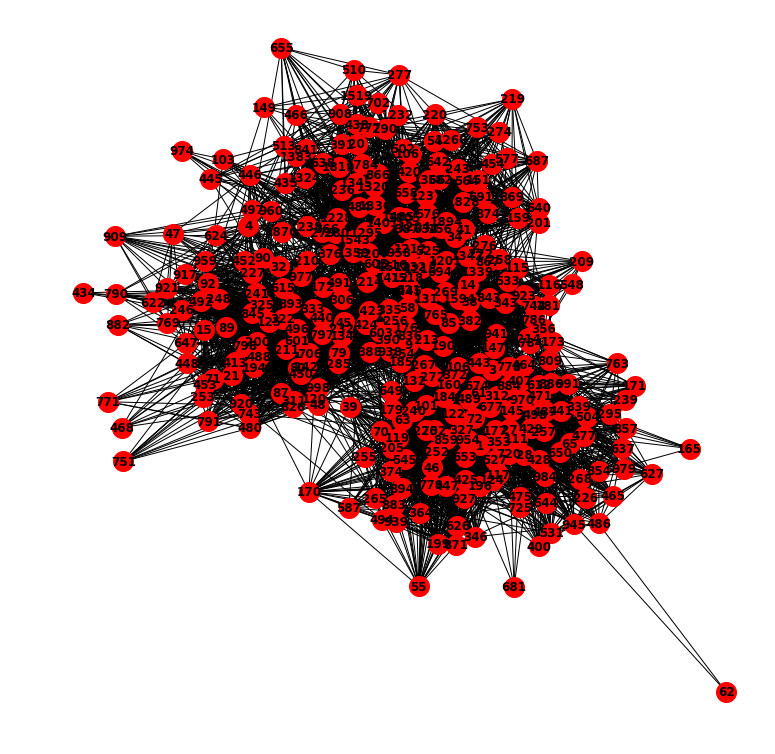

In [8]:
plt.figure(figsize = (10,10))
nx.draw(G, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')

In [52]:

gen = attribute_data.loc[attribute_data['studentID'] == 202,'Gender']
gen

84    F
Name: Gender, dtype: object

In [ ]:
gen = attribute_data.loc[attribute_data['studentID'] == 202]

if (gen[0]['Gender'] == 'F'):
    print('True')


In [64]:
n = list(sub_g.nodes)





In [ ]:
attribute_data['studentID']

In [70]:
gen = attribute_data[attribute_data['studentID'].isin(n)]

In [73]:
gen

,studentID,Class,Gender
6,927,2BIO1,F
36,111,2BIO1,F
43,886,2BIO2,F
47,3,2BIO2,M
58,312,2BIO2,F
59,612,2BIO2,F
60,339,2BIO2,F
61,884,2BIO2,F
63,147,2BIO2,M
81,119,2BIO3,F


In [ ]:
for i in gen.index:
    print(gen[i]['studentID'])

In [ ]:
for n in list(sub_g.nodes):
    print(n)

In [19]:
sub_g = nx.Graph(((source, target, attr) 
                for source, target, attr in G.edges(data=True) 
                    if attr['weight'] < 0.01))

In [36]:
sub_g.nodes

NodeView((202, 545, 3, 147, 884, 312, 612, 339, 886, 258, 603, 1359, 1204, 1342, 1401, 1412, 211, 242, 634, 41, 1828, 1594, 269, 513, 655, 275, 255, 119, 122, 111, 927))

In [38]:
sub_g.node[202]['gender'] = 'M'

In [39]:
sub_g.nodes(data=True)

NodeDataView({202: {'gender': 'M'}, 545: {}, 3: {}, 147: {}, 884: {}, 312: {}, 612: {}, 339: {}, 886: {}, 258: {}, 603: {}, 1359: {}, 1204: {}, 1342: {}, 1401: {}, 1412: {}, 211: {}, 242: {}, 634: {}, 41: {}, 1828: {}, 1594: {}, 269: {}, 513: {}, 655: {}, 275: {}, 255: {}, 119: {}, 122: {}, 111: {}, 927: {}})

In [33]:
for i in sub_g.nodes.index:
    sub_g.set_node_attributes[i]['gender'] = 'M'

AttributeError: 'NodeView' object has no attribute 'index'

In [34]:
sub_g.nodes[0]['gender'] = 'M'

KeyError: 0

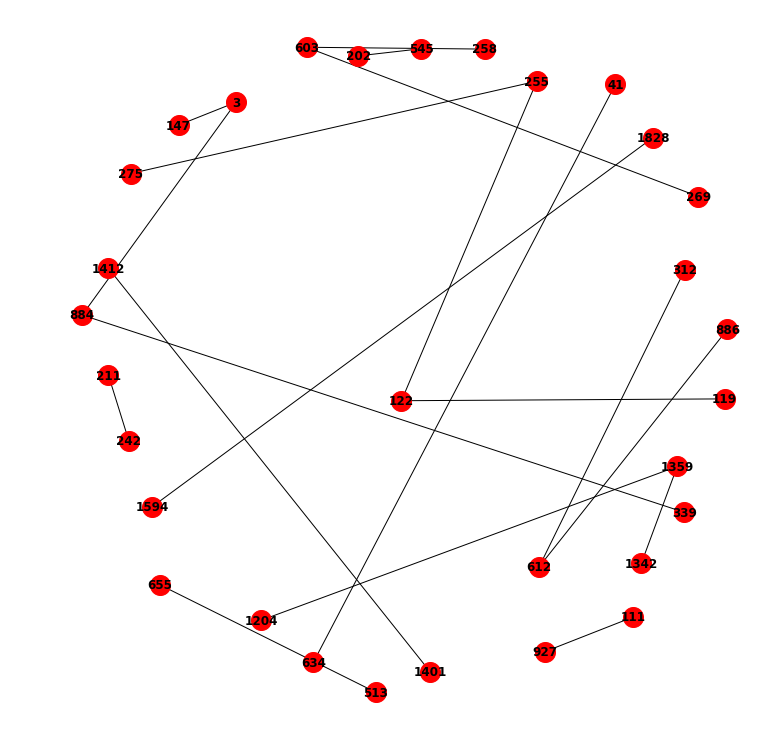

In [21]:
plt.figure(figsize = (10,10))
nx.draw(sub_g, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')

AttributeError: module 'networkx' has no attribute 'draw_planar'